# Motor Position Analysis
This notebook analyzes target vs actual motor positions from the NetworkSyncTest CSV output.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Update this path to your actual CSV file
csv_path = r"C:\motor_positions\motor_positions_20251026_211241.csv"
df = pd.read_csv(csv_path)

# Display first few rows
df.head()

,Timestamp,Movement,Motor6_Target,Motor6_Actual,Motor6_Diff,Motor5_Target,Motor5_Actual,Motor5_Diff,Motor4_Target,Motor4_Actual,Motor4_Diff
0,2025-10-26 21:12:57.705,0,0,0,0,640,496,-144,-640,-630,10
1,2025-10-26 21:12:57.887,1,0,0,0,640,496,-144,-640,-636,4
2,2025-10-26 21:12:57.978,2,0,0,0,680,520,-160,-680,-672,8
3,2025-10-26 21:12:58.116,3,0,0,0,720,548,-172,-720,-707,13
4,2025-10-26 21:12:58.279,4,0,0,0,840,692,-148,-840,-829,11


In [8]:
# Extract motor information
motor_cols = [col for col in df.columns if col.startswith('Motor')]
motor_indices = sorted(list(set([col.split('_')[0] for col in motor_cols])))

print(f"Found {len(motor_indices)} motors in the data")
print(f"Total movements: {len(df)}")
print(f"Motors: {motor_indices}")

Found 3 motors in the data
Total movements: 136
Motors: ['Motor4', 'Motor5', 'Motor6']


## Individual Motor Analysis
For each motor, we plot:
1. Target vs Actual position over time
2. Position error (difference) over time
3. Target vs Actual correlation

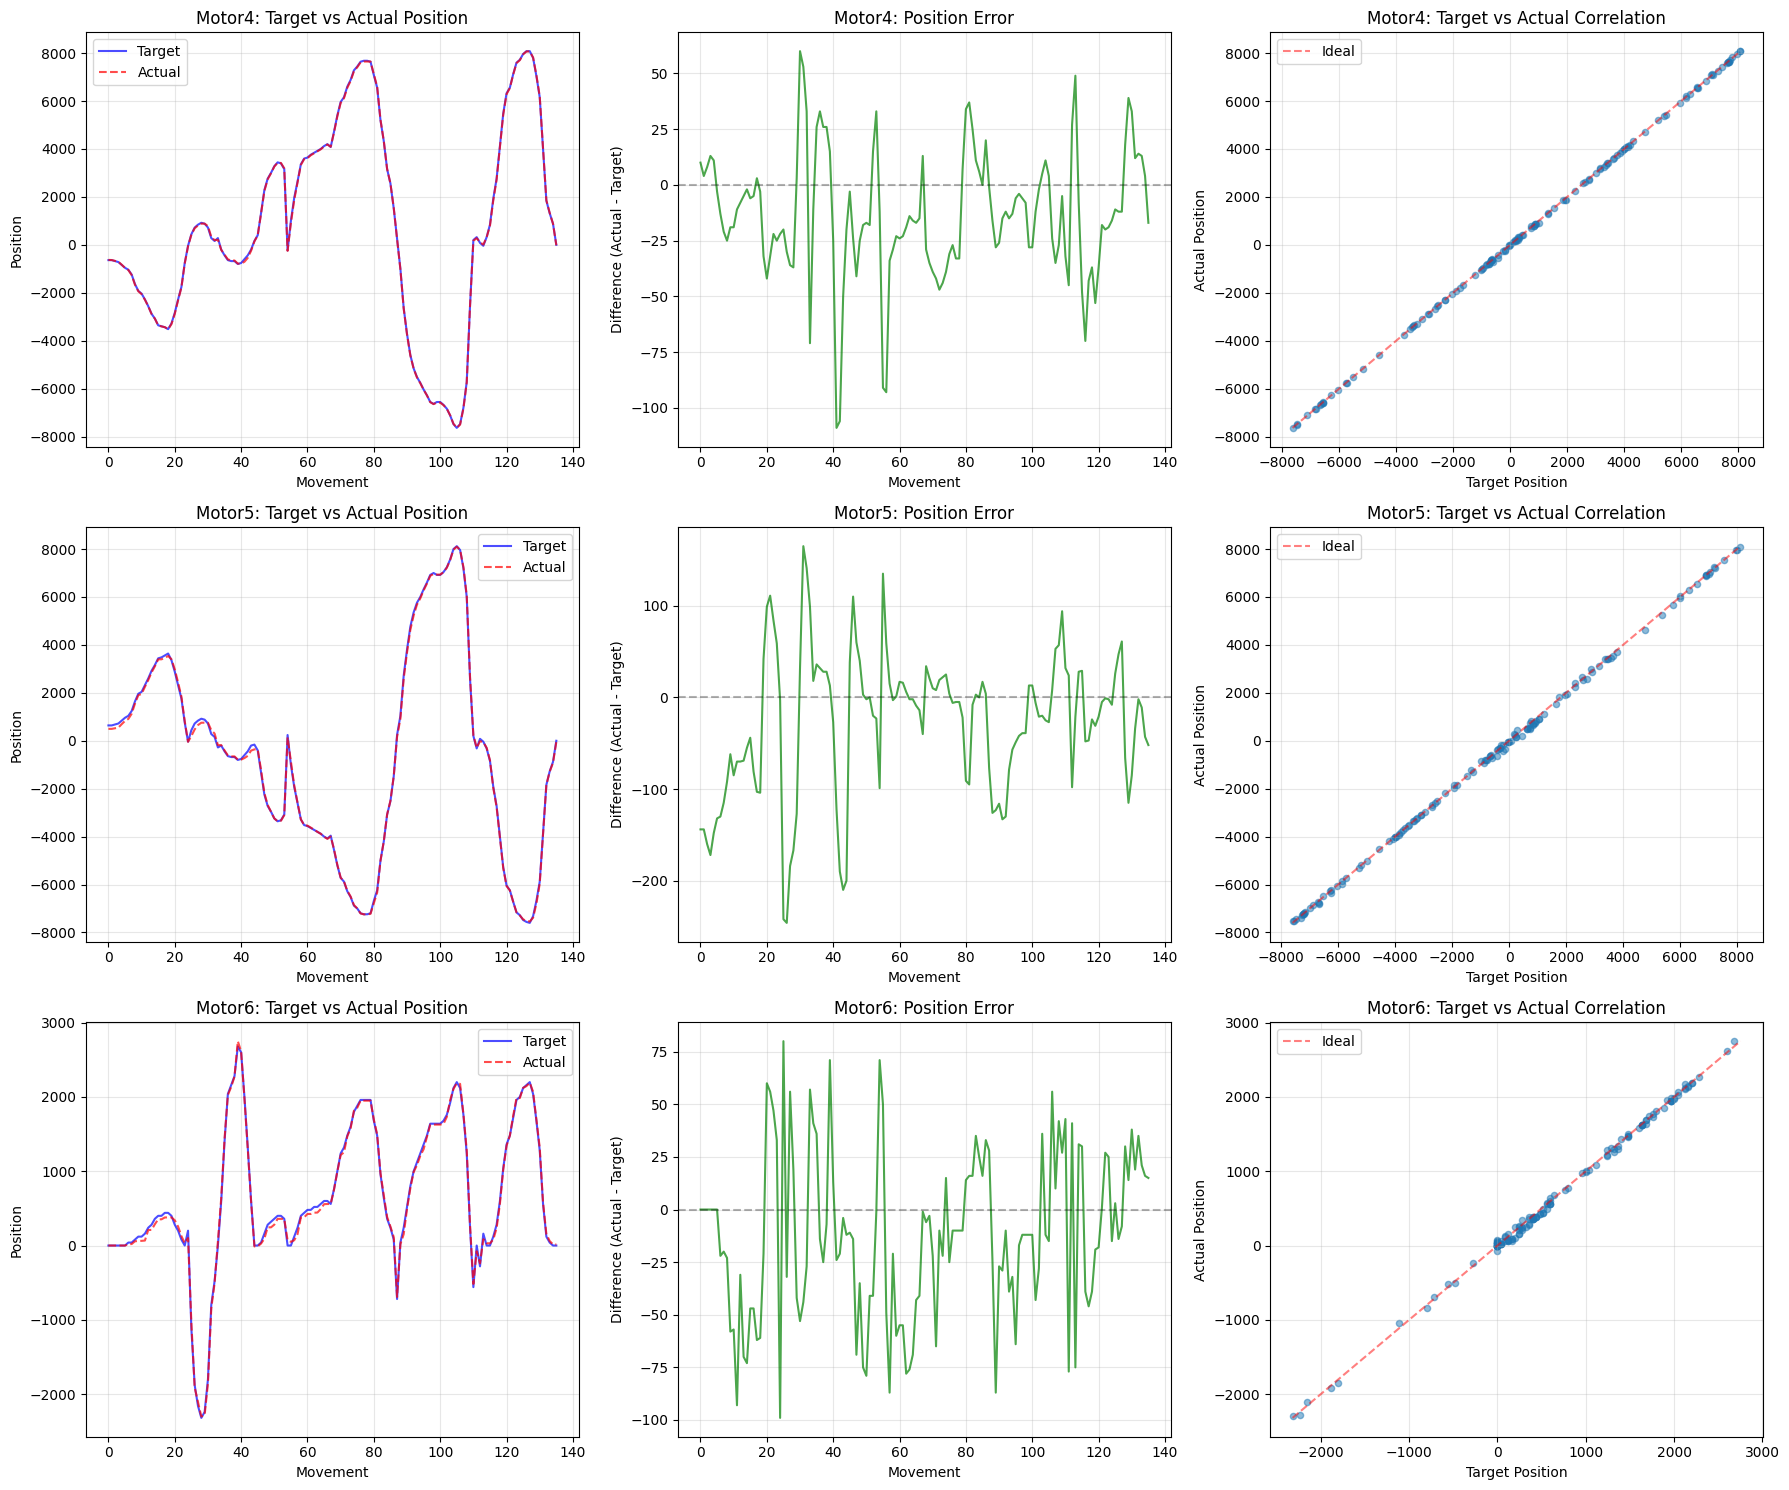

In [9]:
# Create figure with subplots for each motor
n_motors = len(motor_indices)
fig, axes = plt.subplots(n_motors, 3, figsize=(18, 5*n_motors))

# Handle single motor case
if n_motors == 1:
    axes = axes.reshape(1, -1)

for idx, motor in enumerate(motor_indices):
    target_col = f"{motor}_Target"
    actual_col = f"{motor}_Actual"
    diff_col = f"{motor}_Diff"
    
    # Plot 1: Target vs Actual Position
    axes[idx, 0].plot(df['Movement'], df[target_col], 'b-', label='Target', alpha=0.7)
    axes[idx, 0].plot(df['Movement'], df[actual_col], 'r--', label='Actual', alpha=0.7)
    axes[idx, 0].set_xlabel('Movement')
    axes[idx, 0].set_ylabel('Position')
    axes[idx, 0].set_title(f'{motor}: Target vs Actual Position')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Plot 2: Position Difference
    axes[idx, 1].plot(df['Movement'], df[diff_col], 'g-', alpha=0.7)
    axes[idx, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[idx, 1].set_xlabel('Movement')
    axes[idx, 1].set_ylabel('Difference (Actual - Target)')
    axes[idx, 1].set_title(f'{motor}: Position Error')
    axes[idx, 1].grid(True, alpha=0.3)
    
    # Plot 3: Scatter plot of Target vs Actual
    axes[idx, 2].scatter(df[target_col], df[actual_col], alpha=0.5, s=20)
    
    # Add ideal line (y=x)
    min_val = min(df[target_col].min(), df[actual_col].min())
    max_val = max(df[target_col].max(), df[actual_col].max())
    axes[idx, 2].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='Ideal')
    
    axes[idx, 2].set_xlabel('Target Position')
    axes[idx, 2].set_ylabel('Actual Position')
    axes[idx, 2].set_title(f'{motor}: Target vs Actual Correlation')
    axes[idx, 2].legend()
    axes[idx, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('motor_positions_individual.png', dpi=300, bbox_inches='tight')
plt.show()

## Combined Analysis
View all motors together for comparison

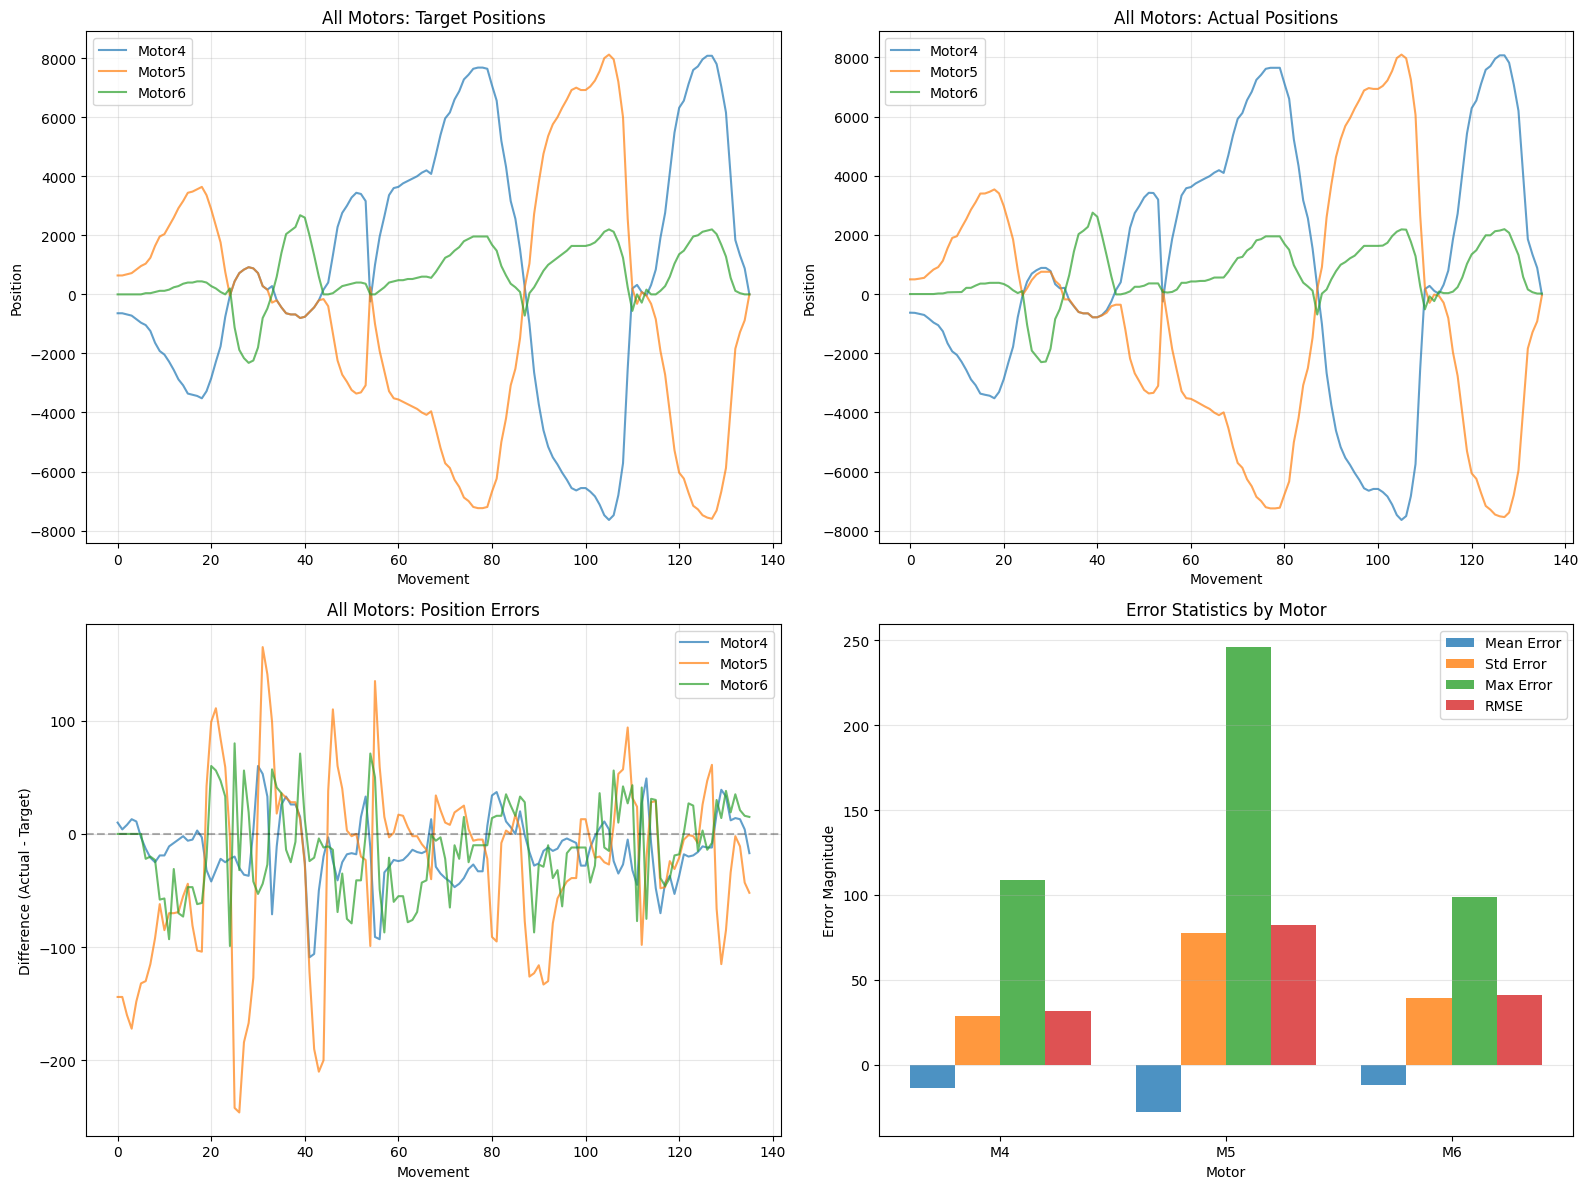

In [10]:
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: All Target Positions
for motor in motor_indices:
    target_col = f"{motor}_Target"
    axes2[0, 0].plot(df['Movement'], df[target_col], label=motor, alpha=0.7)
axes2[0, 0].set_xlabel('Movement')
axes2[0, 0].set_ylabel('Position')
axes2[0, 0].set_title('All Motors: Target Positions')
axes2[0, 0].legend()
axes2[0, 0].grid(True, alpha=0.3)

# Plot 2: All Actual Positions
for motor in motor_indices:
    actual_col = f"{motor}_Actual"
    axes2[0, 1].plot(df['Movement'], df[actual_col], label=motor, alpha=0.7)
axes2[0, 1].set_xlabel('Movement')
axes2[0, 1].set_ylabel('Position')
axes2[0, 1].set_title('All Motors: Actual Positions')
axes2[0, 1].legend()
axes2[0, 1].grid(True, alpha=0.3)

# Plot 3: All Position Differences
for motor in motor_indices:
    diff_col = f"{motor}_Diff"
    axes2[1, 0].plot(df['Movement'], df[diff_col], label=motor, alpha=0.7)
axes2[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes2[1, 0].set_xlabel('Movement')
axes2[1, 0].set_ylabel('Difference (Actual - Target)')
axes2[1, 0].set_title('All Motors: Position Errors')
axes2[1, 0].legend()
axes2[1, 0].grid(True, alpha=0.3)

# Plot 4: Error Statistics
error_stats = []
for motor in motor_indices:
    diff_col = f"{motor}_Diff"
    error_stats.append({
        'Motor': motor,
        'Mean Error': df[diff_col].mean(),
        'Std Error': df[diff_col].std(),
        'Max Error': df[diff_col].abs().max(),
        'RMSE': np.sqrt((df[diff_col]**2).mean())
    })

error_df = pd.DataFrame(error_stats)
x = np.arange(len(error_df))
width = 0.2

axes2[1, 1].bar(x - width*1.5, error_df['Mean Error'], width, label='Mean Error', alpha=0.8)
axes2[1, 1].bar(x - width*0.5, error_df['Std Error'], width, label='Std Error', alpha=0.8)
axes2[1, 1].bar(x + width*0.5, error_df['Max Error'], width, label='Max Error', alpha=0.8)
axes2[1, 1].bar(x + width*1.5, error_df['RMSE'], width, label='RMSE', alpha=0.8)

axes2[1, 1].set_xlabel('Motor')
axes2[1, 1].set_ylabel('Error Magnitude')
axes2[1, 1].set_title('Error Statistics by Motor')
axes2[1, 1].set_xticks(x)
axes2[1, 1].set_xticklabels([m.replace('Motor', 'M') for m in error_df['Motor']])
axes2[1, 1].legend()
axes2[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('motor_positions_combined.png', dpi=300, bbox_inches='tight')
plt.show()

## Summary Statistics

In [11]:
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)
for _, row in error_df.iterrows():
    print(f"\n{row['Motor']}:")
    print(f"  Mean Error:     {row['Mean Error']:8.2f}")
    print(f"  Std Deviation:  {row['Std Error']:8.2f}")
    print(f"  Max Error:      {row['Max Error']:8.2f}")
    print(f"  RMSE:           {row['RMSE']:8.2f}")
print("="*60)

# Display as DataFrame
error_df

SUMMARY STATISTICS

Motor4:
  Mean Error:       -13.53
  Std Deviation:     28.45
  Max Error:        109.00
  RMSE:              31.41

Motor5:
  Mean Error:       -28.15
  Std Deviation:     77.30
  Max Error:        246.00
  RMSE:              82.00

Motor6:
  Mean Error:       -12.21
  Std Deviation:     39.36
  Max Error:         99.00
  RMSE:              41.07


,Motor,Mean Error,Std Error,Max Error,RMSE
0,Motor4,-13.529412,28.447207,109,31.406022
1,Motor5,-28.147059,77.297552,246,81.995337
2,Motor6,-12.205882,39.355760,99,41.066660
